# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "Metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | hami
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | nybro
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | madimba
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.05,68,61,5.25,PF,1667760078
1,mataura,-46.1927,168.8643,7.81,76,5,1.45,NZ,1667760078
2,cabo san lucas,22.8909,-109.9124,28.67,60,20,2.57,MX,1667759909
3,hami,42.8000,93.4500,8.60,25,39,2.28,CN,1667760079
4,bluff,-46.6000,168.3333,9.38,74,0,5.78,NZ,1667760080


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.05,68,61,5.25,PF,1667760078
1,mataura,-46.1927,168.8643,7.81,76,5,1.45,NZ,1667760078
2,cabo san lucas,22.8909,-109.9124,28.67,60,20,2.57,MX,1667759909
3,hami,42.8000,93.4500,8.60,25,39,2.28,CN,1667760079
4,bluff,-46.6000,168.3333,9.38,74,0,5.78,NZ,1667760080


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

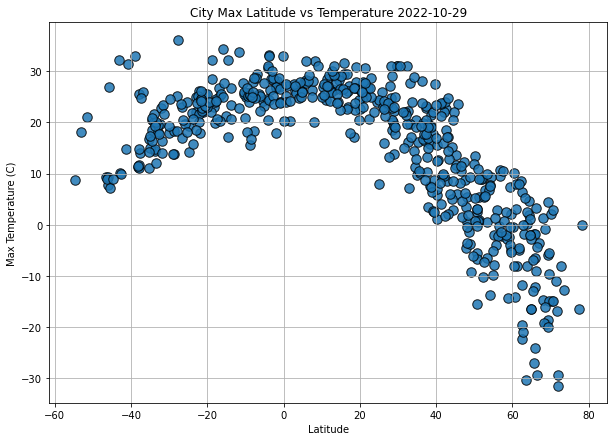

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,7),
              title="City Max Latitude vs Temperature 2022-10-29", alpha=.85, facecolors="blue", edgecolors='black', s=90)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
# plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

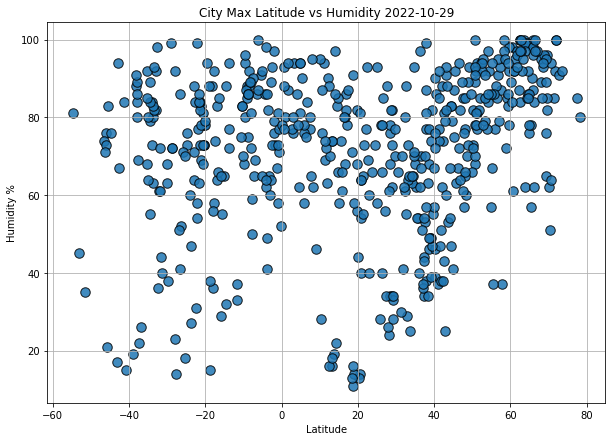

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,7),
              title="City Max Latitude vs Humidity 2022-10-29", alpha=.85, facecolors="blue", edgecolors='black', s=90)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
# plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

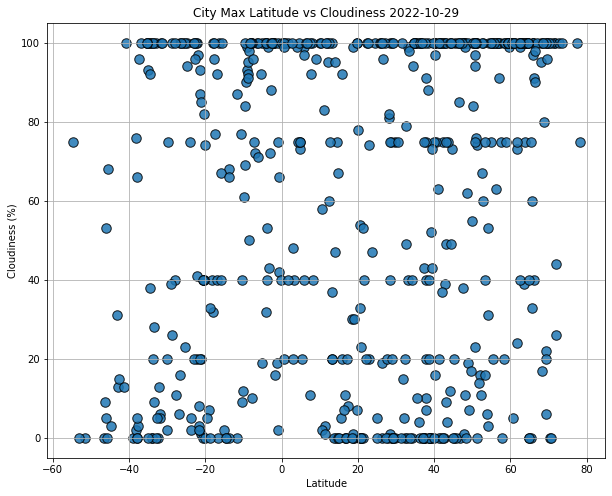

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,8),
              title="City Max Latitude vs Cloudiness 2022-10-29", alpha=.85, facecolors="blue", edgecolors='black', s=90)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
# plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

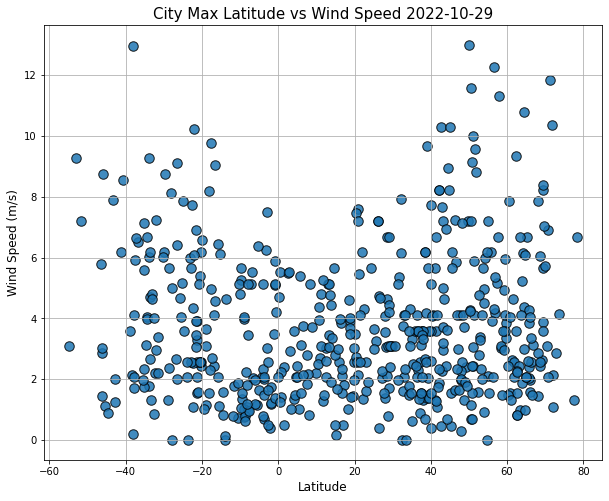

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,8),
               alpha=.85, facecolors="blue", edgecolors='black', s=90)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Max Latitude vs Wind Speed 2022-10-29", fontsize=15)

# Save the figure
# plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# Define a function to create Linear Regression plots

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cabo san lucas,22.8909,-109.9124,28.67,60,20,2.57,MX,1667759909
3,hami,42.8000,93.4500,8.60,25,39,2.28,CN,1667760079
5,katsuura,35.1333,140.3000,16.16,62,100,3.32,JP,1667760080
7,nybro,56.7446,15.9071,9.58,91,100,4.19,SE,1667759869
8,tiksi,71.6872,128.8694,-16.80,92,100,10.35,RU,1667760081


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.05,68,61,5.25,PF,1667760078
1,mataura,-46.1927,168.8643,7.81,76,5,1.45,NZ,1667760078
4,bluff,-46.6000,168.3333,9.38,74,0,5.78,NZ,1667760080
6,vaini,-21.2000,-175.2000,22.09,83,20,1.54,TO,1667760080
10,bredasdorp,-34.5322,20.0403,18.56,89,100,4.04,ZA,1667760082


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7308261369112792


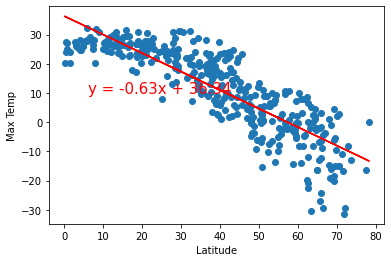

In [17]:
# Linear regression on Northern Hemisphere
temp_nx = northern_hemi_df['Lat']
temp_ny = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_nx, temp_ny)


regress_values = temp_nx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(temp_nx,temp_ny)

plt.plot(temp_nx,regress_values,"r-")

plt.annotate(line_eq, (6,10), fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.37678023862629684


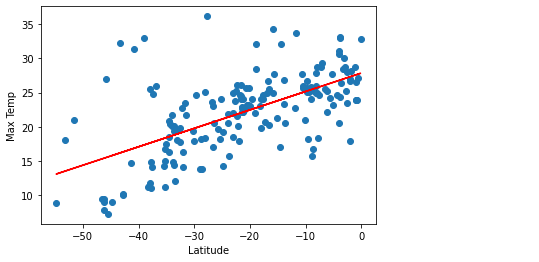

In [18]:
# Linear regression on Southern Hemisphere
temp_sx = southern_hemi_df['Lat']
temp_sy = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_sx, temp_sy)


regress_values = temp_sx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(temp_sx,temp_sy)

plt.plot(temp_sx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a moderate to slightly strong correaltion between Latitude and temeprature. In the Southern Hemisphere there is a weak correlation between temperature and latitude. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11724512367017914


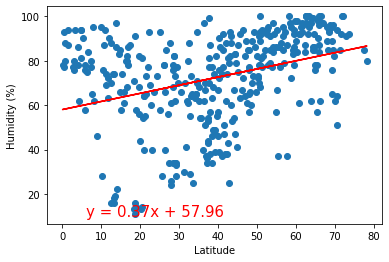

In [19]:
# Northern Hemisphere
hum_nx = northern_hemi_df['Lat']
hum_ny = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(hum_nx, hum_ny)


regress_values = hum_nx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(hum_nx,hum_ny)

plt.plot(hum_nx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0329614637710775


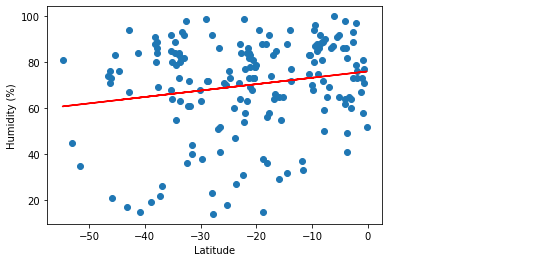

In [20]:
# Southern Hemisphere
hum_sx = southern_hemi_df['Lat']
hum_sy = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(hum_sx, hum_sy)


regress_values = hum_sx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(hum_sx,hum_sy)

plt.plot(hum_sx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Nothern and Southern Hemispheres there is no correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot


The r-squared is: 0.03904394667966436


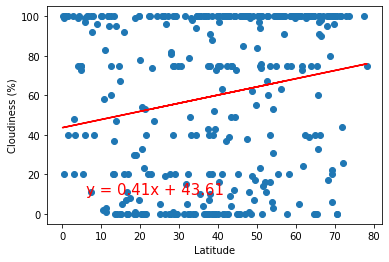

In [21]:
# Northern Hemisphere
cloud_nx = northern_hemi_df['Lat']
cloud_ny = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_nx, cloud_ny)


regress_values = cloud_nx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(cloud_nx,cloud_ny)

plt.plot(cloud_nx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1003545163004014


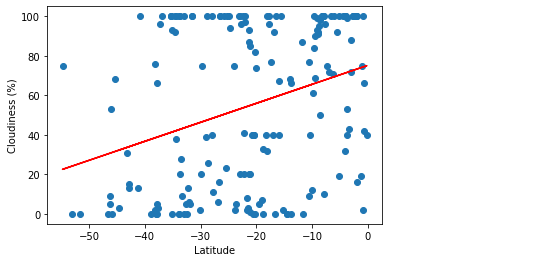

In [22]:
# Southern Hemisphere
cloud_sx = southern_hemi_df['Lat']
cloud_sy = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_sx, cloud_sy)


regress_values = cloud_sx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(cloud_sx,cloud_sy)

plt.plot(cloud_sx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Nothern and Southern Hemispheres there is no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.035410339487376194


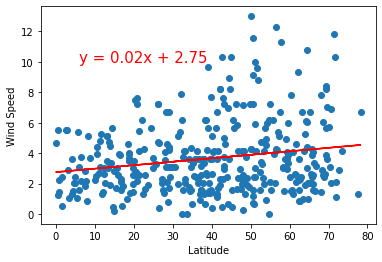

In [23]:
# Northern Hemisphere
wind_nx = northern_hemi_df['Lat']
wind_ny = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_nx, wind_ny)


regress_values = wind_nx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(wind_nx,wind_ny)

plt.plot(wind_nx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07926366022505327


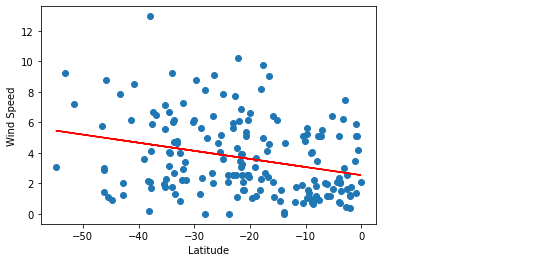

In [24]:
# Southern Hemisphere
wind_sx = southern_hemi_df['Lat']
wind_sy = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_sx, wind_sy)


regress_values = wind_sx * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(wind_sx,wind_sy)

plt.plot(wind_sx,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the Nothern and Southern Hemispheres there is no correlation between wind speed and latitude.